In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
    # Deep learning
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(74, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(74, (5, 5), activation="relu"),
    tf.keras.layers.Flatten(),
    # Machine learning
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [5]:
model_output = model.fit(X_train, Y_train, epochs=5)
model.evaluate(X_test, Y_test)

Epoch 1/5
1500/1500 [==============================] - 28s 18ms/step - loss: 0.1697 - accuracy: 0.9464
Epoch 2/5
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0533 - accuracy: 0.9837
Epoch 3/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0368 - accuracy: 0.9890
Epoch 4/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0276 - accuracy: 0.9913
Epoch 5/5
313/313 [==============================] - 5s 14ms/step - loss: 0.0354 - accuracy: 0.9893


[0.03535917028784752, 0.989300012588501]

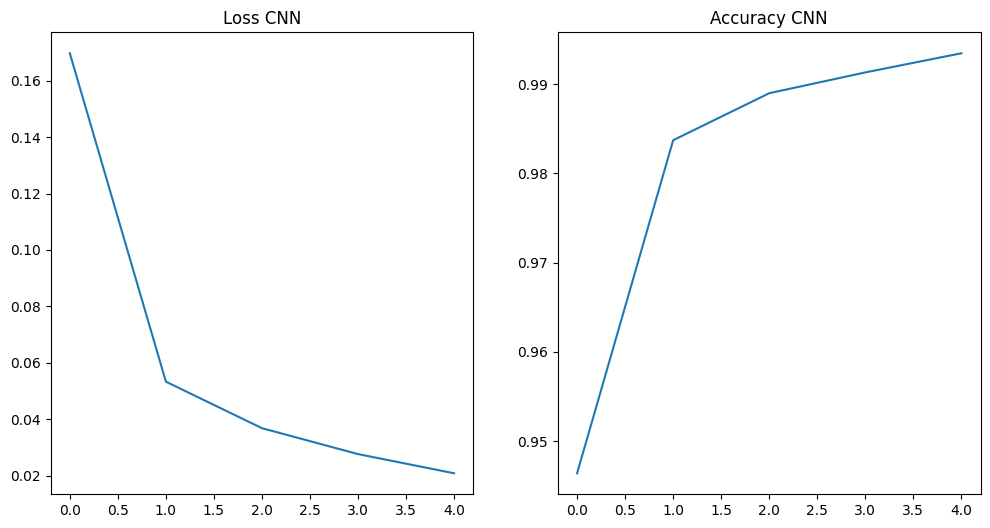

In [15]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss CNN")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy CNN")
plt.show()